<a href="https://colab.research.google.com/github/Ever-Alarcon/Procesamiento-se-ales/blob/main/Sumatoria_de_se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1) Sumar señales senoidales (10,100,10)Hz
##2) RBG de 0.3

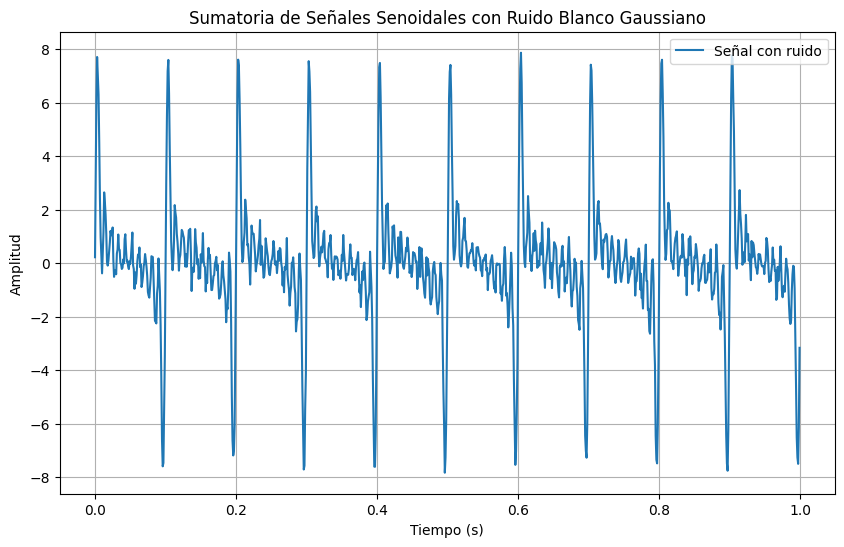

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000  # Frecuencia de muestreo (Hz)
T = 1  # Duración de la señal (segundos)
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Vector de tiempo

# Generar la sumatoria de señales senoidales
frecuencias = np.arange(10, 110, 10)  # Frecuencias de 10 Hz a 100 Hz
senal = sum(np.sin(2 * np.pi * f * t) for f in frecuencias)

# Añadir ruido blanco gaussiano
ruido = np.random.normal(0, 0.3, len(t))    #media, desviación y Número de muestras del ruido
senal_con_ruido = senal + ruido

# Graficar la señal
plt.figure(figsize=(10, 6))
plt.plot(t, senal_con_ruido, label='Señal con ruido')
plt.title('Sumatoria de Señales Senoidales con Ruido Blanco Gaussiano')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

##3)señal a FFT y luego a W.

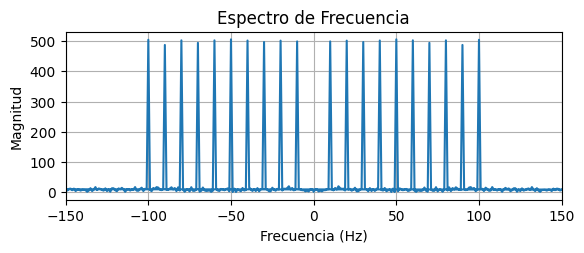

In [ ]:
from scipy.fftpack import fft, fftfreq


# Calcular la FFT
fft_result = np.fft.fft(senal_con_ruido)
fft_freq = np.fft.fftfreq(len(t), 1/fs)

# Graficar el espectro de frecuencia
plt.subplot(2, 1, 2)
plt.plot(fft_freq, np.abs(fft_result))
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-150, 150)  # Ajusta los límites según tus necesidades
plt.grid()

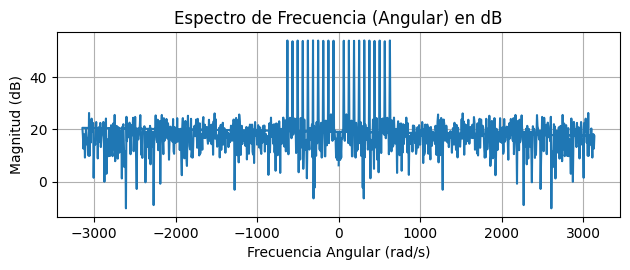

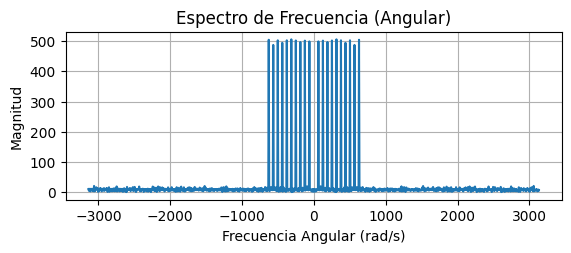

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

angular_freq = 2 * np.pi * fft_freq
# Magnitud en decibelios
magnitude_db = 20 * np.log10(np.abs(fft_result))


# Graficar espectro en frecuencia angular
plt.subplot(2, 1, 2)
plt.plot(angular_freq, magnitude_db)
plt.title('Espectro de Frecuencia (Angular) en dB')
plt.xlabel('Frecuencia Angular (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.grid()

plt.tight_layout()
plt.show()

# Plot
plt.subplot(2, 1, 2)
plt.plot(angular_freq, np.abs(fft_result))
plt.title('Espectro de Frecuencia (Angular)')
plt.xlabel('Frecuencia Angular (rad/s)')
plt.ylabel('Magnitud')
plt.grid()

##4) pasar de w a IFFT y obtener la señal original

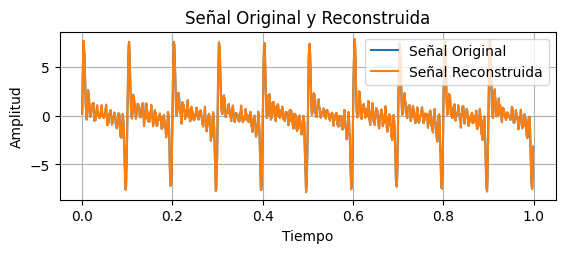

In [ ]:
# Calcular la FFT
#fft_result = np.fft.fft(senal_con_ruido)
#fft_freq = np.fft.fftfreq(len(t), 1/fs)


# Calcular la transformada inversa de Fourier
senal_reconstruida = np.fft.ifft(fft_result)

# Graficar la señal original y la reconstruida
plt.subplot(2, 1, 1)
plt.plot(t, senal_con_ruido, label='Señal Original')
plt.plot(t, senal_reconstruida.real, label='Señal Reconstruida')
plt.legend()
plt.title('Señal Original y Reconstruida')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()

##5) Cortar armonicos de w=w_f
##6)w_f a IFFT a Signal_fit

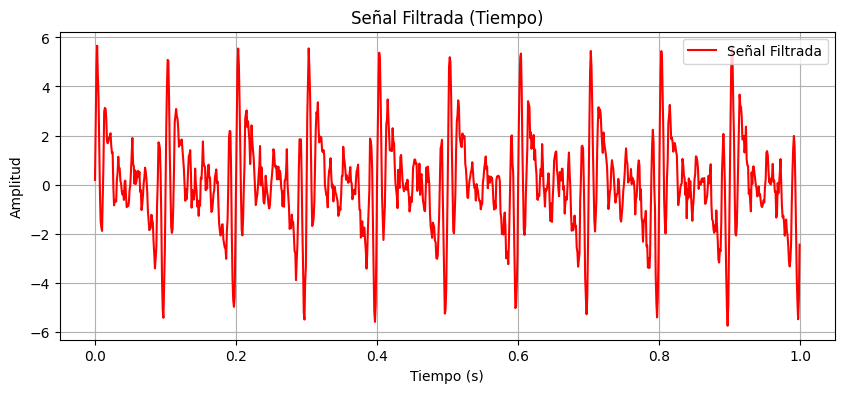

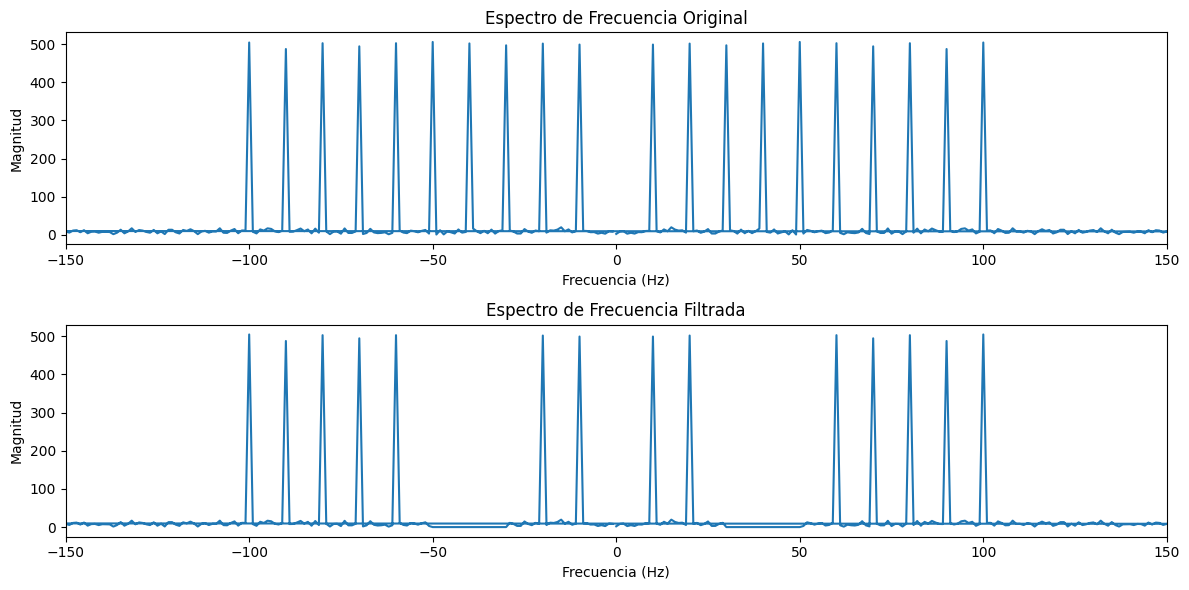

In [ ]:
# FFT de la señal
fft_result = np.fft.fft(senal_con_ruido)
fft_freq = np.fft.fftfreq(len(t), 1/fs)

# Aplicar el filtro eliminando frecuencias entre 30 Hz y 50 Hz
filtro = np.ones_like(fft_result)
filtro[(fft_freq >= 30) & (fft_freq <= 50)] = 0
filtro[(fft_freq <= -30) & (fft_freq >= -50)] = 0  # Filtrar las frecuencias negativas

fft_filtrada = fft_result * filtro

# Reconstruir la señal filtrada con IFFT
señal_filtrada = np.fft.ifft(fft_filtrada)

# Graficar la señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(t, señal_filtrada, label='Señal Filtrada', color='red')
#plt.plot(t, senal_filtrada.real, label='Señal Filtrada', color='red')
plt.title('Señal Filtrada (Tiempo)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


# Graficar el espectro antes y después del filtrado
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(fft_freq, np.abs(fft_result))
plt.title('Espectro de Frecuencia Original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-150, 150)

plt.subplot(2, 1, 2)
fft_result_filtrada = np.fft.fft(señal_filtrada)
plt.plot(fft_freq, np.abs(fft_result_filtrada))
plt.title('Espectro de Frecuencia Filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-150, 150)

plt.tight_layout()
plt.show()